In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact

In [5]:
import requests

In [6]:
from PIL import Image

In [7]:
import io

In [8]:
%matplotlib inline

In [23]:
# 加工する画像、正方形領域の一辺、リサイズするか、リサイズする場合の比率

In [16]:
def kuwahara_filter(pic, r = 5, resize = False, rate = 0.5):
    h, w, _ = pic.shape
    if resize: pic = cv2.resize(pic, (int(w * rate), int(h * rate)));
    h, w, _ = pic.shape
    pic = np.pad(pic, ((r, r), (r, r), (0, 0)), "edge")
    ave, var = cv2.integral2(pic)
    # 平均値
    ave = ((ave[: -r - 1,: -r - 1] + ave[r + 1: , r + 1: ] - ave[r + 1: ,: -r - 1] - ave[: -r - 1, r + 1: ]) / (r + 1) ** 2)
    # 分散
    var = ((var [: -r - 1,: -r - 1] +
        var [r + 1: , r + 1: ] -
        var [r + 1: ,: -r - 1] -
        var [: -r - 1, r + 1: ]) / (r + 1) ** 2 - ave ** 2).sum(axis = 2)

    def filt(i, j):
        return np.array([ave[i, j], ave[i + r, j], ave[i, j + r], ave[i + r, j + r]])[
            (np.array([var [i, j],
                var [i + r, j],
                var [i, j + r],
                var [i + r, j + r]
            ]).argmin(axis = 0).flatten(), j.flatten(), i.flatten())].reshape(w, h, _).transpose(1, 0, 2)

    filtered_pic = filt( * np.meshgrid(np.arange(h), np.arange(w))).astype(pic.dtype)
    return filtered_pic

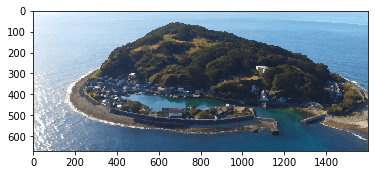

In [25]:
# png形式
pic = np.array(plt.imread("https://shikokunomigishita.jp/spot/2018090700012/file_contents/top.png"))
filtered_pic=kuwahara_filter(pic, 3, False, 0.5)
plt.imshow(filtered_pic)
plt.show()